# [Система прогнозирования клиентских звонков для автодилеров](#toc1_)
- [Описание проекта](#toc1_1_)    
- [Загрузка данных, общая информация и первичная обработка](#toc1_3_)    
  - [`data_for_test.xlsx` — данные об электродах](#toc1_3_1_)    
  - [Вывод:](#toc1_3_2_)    
- [Предобработка данных](#toc1_4_)    
  - [Обработка аномальных значений и выбросов](#toc1_4_1_)    
  - [Обработка пропущенных значений](#toc1_4_2_)    
  - [Удаление дубликатов и опечаток](#toc1_4_3_)    
  - [Изменение индекса датасета](#toc1_4_4_)    
  - [Вывод:](#toc1_4_5_)    
- [Анализ данных](#toc1_5_)    
  - [Функции отрисовок данных](#toc1_5_1_)    
    - [Количественные](#toc1_5_1_1_)    
    - [Временные ряды](#toc1_5_1_2_)    
  - [Вывод:](#toc1_5_2_)    
- [Корреляционный анализ](#toc1_6_)    
  - [Матрица корреляции](#toc1_6_1_)    
  - [Проверка на мультикорреляцию](#toc1_6_2_)    
- [Модели](#toc1_7_)    
  - [Cтатистические модели временных рядов](#toc1_7_1_)    
    - [Автокорреляционный анализ](#toc1_7_1_1_)    
    - [Датасеты](#toc1_7_1_2_)    
    - [Кросс-валидация](#toc1_7_1_3_)    
    - [AR](#toc1_7_1_4_)    
    - [МА](#toc1_7_1_5_)    
    - [ARMA](#toc1_7_1_6_)    
    - [ARIMA](#toc1_7_1_7_)    
    - [ARIMAX](#toc1_7_1_8_)    
    - [SARIMA](#toc1_7_1_9_)    
    - [SARIMAX](#toc1_7_1_10_)    
    - [Анализ моделей](#toc1_7_1_11_)    
  - [Классические модели машинного обучения](#toc1_7_2_)    
    - [Датасеты](#toc1_7_2_1_)    
    - [Разбивка датасета](#toc1_7_2_2_)    
    - [Оценка моделей](#toc1_7_2_3_)    
    - [Пайплайн](#toc1_7_2_4_)    
    - [Перебор гиперпараметров через optuna](#toc1_7_2_5_)    
    - [LinearRegression](#toc1_7_2_6_)    
    - [DecisionTreeRegressor](#toc1_7_2_7_)    
    - [RandomForestRegressor](#toc1_7_2_8_)    
    - [LGBMRegressor](#toc1_7_2_9_)    
    - [CatBoostRegressor](#toc1_7_2_10_)    
    - [Анализ моделей](#toc1_7_2_11_)    
  - [Вывод](#toc1_7_3_)    
- [Общий вывод](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

_____
_____
## <a id='toc1_1_'></a>[Описание проекта](#toc0_)

Сеть автодилеров, реализующих автомобили определённой марки, стремится повысить эффективность рекламных кампаний и оптимизировать работу контактного центра. Для этого необходимо разработать систему, которая позволит предсказывать количество входящих звонков от потенциальных клиентов. Такой подход поможет точнее оценивать отклик на рекламные активности, планировать нагрузку на персонал и повышать конверсию обращений в продажи.

- **Цели и задачи проекта:**  
    - **Прогнозирование клиентской активности**:  
    Построение регрессионной модели, предсказывающей количество входящих звонков по данным о рекламных акциях, времени года и других внешних факторах.  
    - **Оценка влияния рекламы на ТВ**:  
    Количественное измерение эффекта от рекламных кампаний на телевидении с помощью модели, учитывающей исторические данные.  
    - **Анализ динамики и факторов**:  
    Разведочный анализ данных с целью выявления ключевых закономерностей и построения обоснованных гипотез для модели.

- **Ключевые требования к системе:**  
    - **Точность и интерпретируемость модели**:  
    Регрессионная модель должна показывать стабильные результаты при кросс-валидации и быть пригодной для интерпретации выводов по влиянию факторов.  
    - **Визуализация и отчётность**:  
    Система должна обеспечивать построение динамических графиков и отчётов, отражающих как фактические, так и предсказанные значения целевой переменной.

_____
_____
## <a id='toc1_3_'></a>[Загрузка данных, общая информация и первичная обработка](#toc0_)

### <a id='toc1_3_1_'></a>[`data_for_test.xlsx` — данные об электродах](#toc0_)

`data_for_test.xlsx`
- Содержит данные о влиянии медиаактивности и внешних факторов на количество телефонных звонков.
- Всего записей: 762 строки (за период с 01.01.2013 по 01.02.2015).
- Пропущенные значения:
  - Наблюдаются в целевом признаке calls (3 пропущенных значения).
- Количество признаков:
  - 1 временной: date
  - 1 целевой (количественный): calls — количество звонков
  - 4 независимых количественных признака:
- Типы данных: корректны (datetime64[ns], float64, int64).
- Требуются действия:
  - Обработка пропусков в calls.
  - Первичный EDA и анализ влияния факторов на целевую переменную.

|Поле          |Описание                                                           |
|--------------|-------------------------------------------------------------------|
|`date`        |Дата (дни с 1 января 2013 года по 1 февраля 2015 года)             |
|`calls`       |Целевой показатель — суммарное количество телефонных звонков       |
|`tv_grp`      |Показатель медиа активности на национальном телевидении (GRP)      |
|`ooh_contacts`|OTS по наружной рекламе — оценка числа контактов (в тыс.) с целевой|
|`season_index`|Нормированная сезонная оценка (от 0 до 1)                          |
|`usd_rub`     |Курс доллара по Yahoo Finance (рублей за 1 доллар США)             |


_____
_____
## <a id='toc1_4_'></a>[Предобработка данных](#toc0_)

_____
### <a id='toc1_4_1_'></a>[Обработка аномальных значений и выбросов](#toc0_)

In [8]:
plot_boxplots(data, 'data', rows=2, height=700)

- Признак `calls` содержит выбросы (значения > 100), но они отражают пиковую нагрузку (например, маркетинговые акции) — не следует удалять.
- `tv_grp` содержит множество нулей и редкие пики — типично для ТВ-рекламы. Выбросы допустимы.
- В `ooh_contacts` зафиксированы экстремальные значения (>150 000) — необходимо дополнительное исследование источника (возможен ручной выброс).
- `season_index` - нормированный (minmax) показатель.
- `usd_rub` отражают реальность.

In [9]:
data[data.ooh_contacts > 30_000]

,date,calls,tv_grp,ooh_contacts,season_index,usd_rub
59,2013-03-01,36.0,8499,39075.0,0.759700,30.643000
424,2014-03-01,9.0,0,55543.5,0.759700,35.990898
455,2014-04-01,18.0,0,57999.0,0.515319,35.005501
546,2014-07-01,21.0,20025,145137.0,0.062488,34.317200


- Не думаю, что это выбросы, потому что даты близки к новому году, больше сходит на закономернность.  
Не будем удалять эти строки, потому что они могут быть крайне важны для модели

_____
### <a id='toc1_4_2_'></a>[Обработка пропущенных значений](#toc0_)

In [10]:
def msno_matrix(data: pd.DataFrame, data_name: str):
    _, ax = plt.subplots(figsize=(10, 5))
    msno.matrix(data, ax=ax, sparkline=False, fontsize=10)
    ax.set_title(f'Матрица пропусков: {data_name}', fontsize=15)
    ax.set_xlabel('Признаки', fontsize=15)
    ax.set_ylabel('Наблюдения', fontsize=15)
    plt.show()

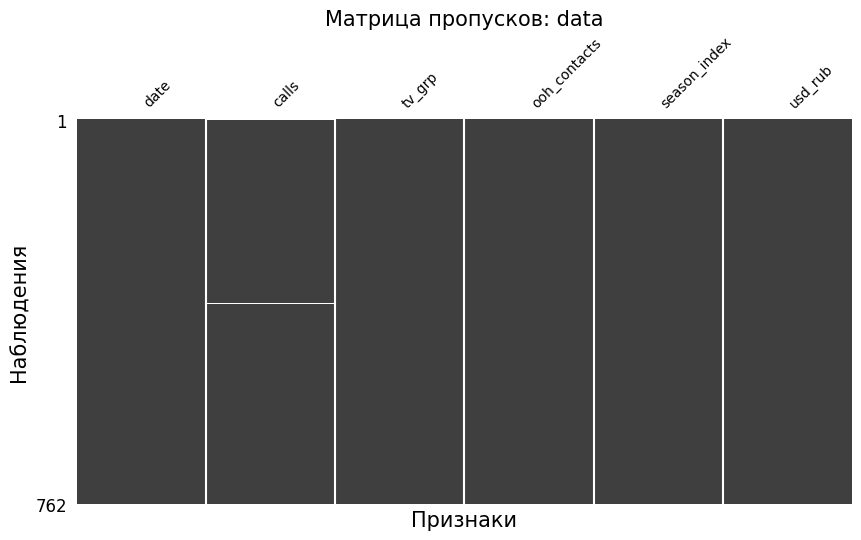

In [11]:
msno_matrix(data, 'data')

- пропуски в таргете

In [12]:
data[data.calls.isna()]

,date,calls,tv_grp,ooh_contacts,season_index,usd_rub
0,2013-01-01,NaN,0,0.0,0.060802,30.502001
365,2014-01-01,NaN,0,0.0,0.060802,32.683201
730,2015-01-01,NaN,0,0.0,0.060802,60.700001


- Первого января отдых, поэтому заполним нулями...

_____
### <a id='toc1_4_5_'></a>[Вывод:](#toc0_)

- Удалены выбросы
- Сменился индекс датафрейма


In [16]:
data.rename(columns=column_translation)

,Количество звонков,Активность ТВ,Контакты OOH,Сезонный индекс,Курс доллара
date,,,,,
2013-01-01,0.0,0,0.0,0.060802,30.502001
2013-01-02,0.0,0,0.0,0.060802,30.337200
2013-01-03,17.0,0,0.0,0.060802,30.156500
2013-01-04,17.0,0,0.0,0.060802,30.271000
2013-01-05,8.0,0,0.0,0.060802,30.271000
...,...,...,...,...,...
2015-01-28,22.0,0,0.0,0.060802,67.955002
2015-01-29,36.0,0,0.0,0.060802,67.790001
2015-01-30,38.0,0,0.0,0.060802,68.735001


_____
_____
## <a id='toc1_5_'></a>[Анализ данных](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_1_1_'></a>[Количественные](#toc0_)

In [18]:
for num_col in data.select_dtypes(include='number').columns:
    statistical_graphis_for_numeric(data=data[num_col])

- Распредление таргета `calls` похоже на нормальное, но с выбросами
- `tv_grp` и `ooh_contacts` из-за выбросов нельзя адекватно оценить, значения либо близки к 0, либо очень большие
- к `season_index` как будто применили minmax 
- `usd_rub` имеет мультимодальное распределение. Видно что в течении этих лет курс скокал, и не имел постоянную тенденцию роста или падения

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_1_2_'></a>[Временные ряды](#toc0_)

In [19]:
for num_col in data.select_dtypes(include='number').columns:
    statistical_graphis_for_time_series(data[num_col],
                                        resample='1D',
                                        rolling_window=4,
                                        visible_range=pd.DateOffset(months=4))

|Фактор        |Динамика                 |Сезонность  |Выбросы        |Примечания          |
|--------------|-------------------------|------------|---------------|--------------------|
|`calls`       |Явный тренд, сезонность  |Да (недели) |Есть           |Таргет              |
|`tv_grp`      |Кампанийная структура    |Слабая/нет  |Мощные всплески|Прерывистые кампании|
|`ooh_contacts`|Сильные редкие выбросы   |Нет         |Есть           |Очень разреженные   |
|`season_index`|Сглаженный сезонный тренд|Да (месяцы) |Нет            |Подходит для фичей  |
|`usd_rub`     |Устойчивый рост          |Нет         |Нет            |Экзогенный фактор   |

*Анализ временного ряда на стационарность*

Временной ряд стационарен, если его статистические свойства (среднее, дисперсия, автокорреляция) остаются постоянными во времени.


$H_0$: Ряд не стационарен 

In [20]:
result = adfuller(data.calls)
if result[1] < 0.05:
    print("Ряд стационарен (отвергаем H0)")
else:
    print("Ряд нестационарен (не отвергаем H0)")

Ряд стационарен (отвергаем H0)


_____
### <a id='toc1_5_2_'></a>[Вывод:](#toc0_)

- Анализ количественных данных:
  - Распределение целевого признака `calls` приближено к нормальному, но содержит выбросы, отражающие пиковую нагрузку (например, маркетинговые акции) — не удаляются.
  - Признаки `tv_grp` и `ooh_contacts` имеют характер кампаний: значения преимущественно около нуля с редкими всплесками — типично для рекламы.
  - `season_index` имеет распределение, типичное для нормированных признаков (вероятно, применён MinMax).
  - `usd_rub` демонстрирует мультимодальное распределение, отражающее нестабильность курса валют за анализируемый период.

- Анализ временных данных:
  - Временной ряд по `calls` демонстрирует явный тренд и сезонность:
    - Недельная цикличность — наблюдается слабая регулярность.
    - Месячная сезонность по `season_index` — ярко выражена.
  - `tv_grp` и `ooh_contacts` имеют кампанийную структуру, сезонность выражена слабо, однако присутствуют значимые пики, важные для модели.
  - `usd_rub` растёт по экспоненте, сезонность и выбросы не наблюдаются, что подтверждает его экзогенный характер.

- Стационарность временного ряда:
  - По результатам теста Дики-Фуллера: ряд стационарен (гипотеза о нестационарности отвергнута при p-value < 0.05).

_____
_____
## <a id='toc1_6_'></a>[Корреляционный анализ](#toc0_)

___
### <a id='toc1_6_1_'></a>[Матрица корреляции](#toc0_)

In [21]:
px.imshow(
    phik.phik.phik_matrix(
        data.rename(columns=column_translation),
        interval_cols=data.select_dtypes(include='number').columns
    ),
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица корреляции для <b>data</b>'
).update_layout(
    width=1200,
    height=1000,
    title_font_size=20,
    font=dict(size=14)
)

Матрица корреляции показывает, что:
- Cамыми коррелирующими с таргетом признаками являются: `Курс доллара` и `Активность ТВ`
- Удалим признак `Контакты ООН`

___
### <a id='toc1_6_2_'></a>[Проверка на мультикорреляцию](#toc0_)


$VIF = \frac{1}{1-R^2}$
- Если $VIF ≈ 1$: мультикорреляции нет.
- Если  $5 ≤ VIF < 10$: возможна умеренная мультикорреляция.
- Если  $VIF ≥ 10$: сильная мультикорреляция.

In [23]:
vif_data = data.copy()
X = add_constant(vif_data)

display(pd.DataFrame({
    'feature': X.columns,
    'vif': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values(by='vif', ascending=False))

,feature,vif
0,const,22.512647
1,calls,1.186901
4,usd_rub,1.103910
2,tv_grp,1.080061
3,season_index,1.011650


- Мультикорреляция отсутствует

_____
_____
## <a id='toc1_7_'></a>[Модели](#toc0_)

___
### <a id='toc1_7_1_'></a>[Cтатистические модели временных рядов](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_1_'></a>[Автокорреляционный анализ](#toc0_)

*Для задача одномерного временного ряда есть специальная оценка зависимости — автокорреляция*

In [30]:
corr_time_series_plot(data.calls, acf, nlags=60)
corr_time_series_plot(data.calls, pacf, nlags=60)

- Постепенное убывание автокорреляционной функции (ACF) указывает на наличие выраженного тренда во временном ряду.
- В ACF заметны периодические пики примерно через каждые 7–8 лагов, что подтверждает недельную сезонность.
- Высокие значения на малых лагах (особенно лаги 1–3) свидетельствуют о сильной зависимости от недавних значений — актуально для моделирования autoregressive (AR) компоненты.
- График частичной автокорреляции (PACF) показывает, что значимыми остаются только первые несколько лагов (особенно 1, 2 и 7), затем значения быстро угасают — это также говорит в пользу модели AR с малым порядком.
- Наиболее коррелирующие лаги с целевым признаком `calls`:  
  *1-14, 7⋅ 3, 7⋅ 4, 7⋅ 8* — можно использовать для построения признаков (feature engineering) или при выборе параметров ARIMA/SARIMA моделей.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_2_'></a>[Датасеты](#toc0_)

*train/val/test = 0.85/0.075/0.075*

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_3_'></a>[Кросс-валидация](#toc0_)

*3 фолда*

<a href="https://education.yandex.ru/handbook/ml/article/kross-validaciya#:~:text=%D0%9A%D1%80%D0%BE%D1%81%D1%81%2D%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BD%D0%B0%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%B0%D1%85">
    <img src="https://yastatic.net/s3/education-portal/media/7_5_7849d6b92e_7fc7a11936.webp" alt="Кросс-валидация временного ряда" width="700">
</a>


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_4_'></a>[AR](#toc0_)

$X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \varepsilon_t$, где
- $X_t$  — значение временного ряда в момент времени $t$
- $c$ — константа
- $p$ — порядок модели (количество лагов)
- $\phi_i$ — коэффициенты авторегрессии
- $X_{t-i}$ — значения временного ряда на предыдущих шагах
- $\varepsilon_t$ — случайный шум, $\varepsilon_t ~ N(0, \sigma^2)$

In [37]:
print(f'Best MAE: {study_ar.best_value:.3f}')
ar = TSModel(
    name='ar',
    Model=AutoReg,
    study=study_ar,
    best_params=study_ar.best_params,
    y_train=y_train,
    y_val=y_val,
    y_test=y_test
)

Best MAE: 6.374


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_5_'></a>[МА](#toc0_)

$X_t = \mu + \varepsilon_t + \sum_{i=1}^{q} \theta_i \varepsilon_{t-i}$, где
- $X_t$ — текущее значение временного ряда
- $\mu$ — среднее значение ряда
- $\varepsilon_t$ — случайная ошибка (белый шум)
- $\theta_i$ — коэффициенты модели
- $q$ — порядок модели (количество лагов для шумов)

In [41]:
print(f'Best MAE: {study_ma.best_value:.3f}')
ma = TSModel(
    name='ma',
    Model=SARIMAX,
    study=study_ma,
    best_params=dict(order=(0, 0, study_ma.best_params['q']), trend=study_ma.best_params['trend']),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test,
)

Best MAE: 7.088


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_6_'></a>[ARMA](#toc0_)

$X_t = \mu + \sum_{i=1}^{p} \varphi_i X_{t-i} + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}$
- $X_t$ — текущее значение временного ряда
- $\mu$ — среднее значение ряда
- $\varphi_i$ — коэффициенты авторегрессии (AR)
- $p$ — порядок модели AR (количество лагов для значений ряда)
- $\varepsilon_t$ — случайная ошибка (белый шум)
- $\theta_j$ — коэффициенты скользящего среднего (MA)
- $q$ — порядок модели MA (количество лагов для шумов)

In [45]:
print(f'Best MAE: {study_arma.best_value:.3f}')
arma = TSModel(
    name='arma',
    Model=SARIMAX,
    study=study_arma,
    best_params=dict(order=(study_arma.best_params['p'], 0, study_arma.best_params['q']),
               trend=study_arma.best_params['trend'],
               enforce_stationarity=study_arma.best_params['enforce_stationarity']),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test
)

Best MAE: 6.263


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_7_'></a>[ARIMA](#toc0_)

$X_t' = \mu + \sum_{i=1}^{p} \varphi_i X_{t-i}' + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}$, где
- $X_t'$ — дифференцированное значение временного ряда, то есть $X_t' = \nabla^d X_t$
- $\mu$ — среднее значение ряда
- $\varphi_i$ — коэффициенты авторегрессии (AR)
- $p$ — порядок модели AR (количество лагов для значений ряда)
- $d$ — порядок интегрирования (количество дифференцирований, необходимых для стационарности)
- $\varepsilon_t$ — случайная ошибка (белый шум)
- $\theta_j$ — коэффициенты скользящего среднего (MA)
- $q$ — порядок модели MA (количество лагов для шумов)

In [49]:
print(f'Best MAE: {study_arima.best_value:.3f}')
arima = TSModel(
    name='arima',
    Model=SARIMAX,
    study=study_arima,
    best_params=dict(order=(study_arima.best_params['p'], 1, study_arima.best_params['q']),
               trend=study_arima.best_params['trend'],
               enforce_stationarity=study_arima.best_params['enforce_stationarity']),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test
)

Best MAE: 6.178


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_8_'></a>[ARIMAX](#toc0_)

$X_t' = \mu + \sum_{i=1}^{p} \varphi_i X_{t-i}' + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{k=1}^{K} \beta_k Z_{t,k}$, где
- $X_t'$ — преобразованный (интегрированный) временной ряд (например, после дифференцирования)
- $\mu$ — постоянная (средний уровень)
- $\varphi_i$ — коэффициенты авторегрессии (AR)
- $\theta_j$ — коэффициенты скользящего среднего (MA)
- $\varepsilon_t$ — случайная ошибка в момент времени $t$
- $Z_{t,k}$ — значение $k$-й внешней (экзогенной) переменной в момент времени $t$
- $\beta_k$ — коэффициент влияния $k$-й экзогенной переменной
- $K$ — общее число внешних переменных

In [53]:
print(f'Best MAE: {study_arimax.best_value:.3f}')
arimax = TSModel(
    name='arimax',
    Model=SARIMAX,
    study=study_arimax,
    best_params=dict(order=(study_arimax.best_params['p'], 1, study_arimax.best_params['q']),
                     trend=study_arimax.best_params['trend'],
                     enforce_stationarity=study_arimax.best_params['enforce_stationarity']),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test,
    X_train=X_train,
    X_val=X_val,
    X_test=X_test,
)

Best MAE: 7.212


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_9_'></a>[SARIMA](#toc0_)

$X_t' = \mu + \sum_{i=1}^{p} \varphi_i X_{t-i}' + \sum_{I=1}^{P} \Phi_I X_{t-sI}' + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{J=1}^{Q} \Theta_J \varepsilon_{t-sJ}$, где:
- $X_t'$ — преобразованный (интегрированный) временной ряд (после обычного и сезонного дифференцирования)
- $\mu$ — постоянная (средний уровень)
- $\varphi_i$ — коэффициенты авторегрессии (AR)
- $\Phi_I$ — коэффициенты **сезонной** авторегрессии (SAR)
- $s$ — сезонный период (например, $s=12$ для месячных данных с годовой сезонностью)
- $\theta_j$ — коэффициенты скользящего среднего (MA)
- $\Theta_J$ — коэффициенты **сезонного** скользящего среднего (SMA)
- $\varepsilon_t$ — случайная ошибка в момент времени $t$

In [57]:
print(f'Best MAE: {study_sarima.best_value:.3f}')
sarima = TSModel(
    name='sarima',
    Model=SARIMAX,
    study=study_sarima,
    best_params=dict(order=(study_sarima.best_params['p'], study_sarima.best_params['d'], study_sarima.best_params['q']),
                     seasonal_order=(study_sarima.best_params['P'], study_sarima.best_params['D'], study_sarima.best_params['Q'], study_sarima.best_params['s']),
                     trend=study_sarima.best_params['trend'],
                     enforce_stationarity=study_sarima.best_params['enforce_stationarity'],
                     enforce_invertibility=study_sarima.best_params['enforce_invertibility'],),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test,
)

Best MAE: 6.242


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_10_'></a>[SARIMAX](#toc0_)

$X_t' = \mu + \sum_{i=1}^{p} \varphi_i X_{t-i}' + \sum_{I=1}^{P} \Phi_I X_{t-sI}' + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{J=1}^{Q} \Theta_J \varepsilon_{t-sJ} + \sum_{k=1}^{K} \beta_k Z_{t,k}$, где:

- $X_t'$ — преобразованный (интегрированный) временной ряд (после обычного и сезонного дифференцирования)
- $\mu$ — постоянная (средний уровень)
- $\varphi_i$ — коэффициенты авторегрессии (AR)
- $\Phi_I$ — коэффициенты **сезонной** авторегрессии (SAR)
- $s$ — сезонный период (например, $s=12$ для месячных данных с годовой сезонностью)
- $\theta_j$ — коэффициенты скользящего среднего (MA)
- $\Theta_J$ — коэффициенты **сезонного** скользящего среднего (SMA)
- $\varepsilon_t$ — случайная ошибка в момент времени $t$
- $Z_{t,k}$ — значение $k$-й внешней (экзогенной) переменной в момент времени $t$
- $\beta_k$ — коэффициент влияния $k$-й экзогенной переменной
- $K$ — общее число внешних переменных


In [61]:
print(f'Best MAE: {study_sarimax.best_value:.3f}')
sarimax = TSModel(
    name='sarimax',
    Model=SARIMAX,
    study=study_sarimax,
    best_params=dict(order=(study_sarimax.best_params['p'], study_sarimax.best_params['d'], study_sarimax.best_params['q']),
                     seasonal_order=(study_sarimax.best_params['P'], study_sarimax.best_params['D'], study_sarimax.best_params['Q'], study_sarimax.best_params['s']),
                     trend=study_sarimax.best_params['trend'],
                     enforce_stationarity=study_sarimax.best_params['enforce_stationarity'],
                     enforce_invertibility=study_sarimax.best_params['enforce_invertibility'],),
    y_train=y_train,
    y_val=y_val,
    y_test=y_test,
    X_train=X_train,
    X_val=X_val,
    X_test=X_test,
)

Best MAE: 7.359


<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_1_11_'></a>[Анализ моделей](#toc0_)

In [ ]:
time_series_ml_analys = pd.DataFrame(columns=['Модель', 'cross-val MAE', 'val MAE', 'Время обучения (с)', 'Время предсказания (мс)']).set_index('Модель', drop=True)
for ts_model in [ar, ma, arma, arima, arimax, sarima, sarimax]:
    model = ts_model.get_model()
    point_0 = time.time()
    model = model.fit() # Время обучения
    point_1 = time.time()
    y_pred = model.predict(start=len(y_train), end=len(y_train) + len(ts_model.y_val) - 1, exog=ts_model.X_val) # Время предсказывания
    point_2 = time.time()
    time_series_ml_analys.loc[ts_model.name] = [ts_model.study.best_value, mean_absolute_error(ts_model.y_val, y_pred), point_1 - point_0, (point_2 - point_1) * 1000]
time_series_ml_analys.sort_values(by=['cross-val MAE']).style.background_gradient(
    'Oranges', subset=['cross-val MAE', 'val MAE', 'Время обучения (с)', 'Время предсказания (мс)']
).format(precision=3)

,cross-val MAE,val MAE,Время обучения (с),Время предсказания (мс)
Модель,,,,
arima,6.178,15.084,1.393,5.373
sarima,6.242,16.643,2.087,0.000
arma,6.263,17.566,1.329,3.504
ar,6.374,17.025,0.015,4.755
ma,7.088,15.686,1.004,0.000
arimax,7.212,3378.330,0.448,14.960
sarimax,7.359,2412.182,6.630,0.000


*Метрики на валидация значительно хуже, чем на кросс-валидации, посмотрим на график предсказания*

In [63]:
model = arima.get_model()
model = model.fit() # Время обучения
y_pred = model.predict(start=len(y_train), end=len(y_train) + len(arima.y_val) - 1, exog=arima.X_val) # Время предсказывания
graphic_of_train_test_pred_line(y_train, y_val, y_pred)

- Видно как даннные на валидации отличаются от трейнового датасета
- Начиная с октября начинается "долгосрочный" рост, модель не видела такого в трейне

___
### <a id='toc1_7_2_'></a>[Классические модели машинного обучения](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_1_'></a>[Датасеты](#toc0_)

*train/val/test = 0.85/0.075/0.075*

In [64]:
data['day_of_week'] = data.index.day_of_week
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
column_translation |= {
    'day_of_week': 'День недели', 
    'day': 'День месяца', 
    'month': 'Месяц', 
    'year': 'Год', 
}
data.tail()

,calls,tv_grp,season_index,usd_rub,day_of_week,day,month,year
date,,,,,,,,
2015-01-28,22.0,0,0.060802,67.955002,2,28,1,2015
2015-01-29,36.0,0,0.060802,67.790001,3,29,1,2015
2015-01-30,38.0,0,0.060802,68.735001,4,30,1,2015
2015-01-31,24.0,0,0.060802,68.735001,5,31,1,2015
2015-02-01,13.0,0,0.000000,68.735001,6,1,2,2015


*Из анализа автокорреляции, возьмем самые зависимые лаги*

`1, 2, 7, 11, 12, 13, 14, 22, 23, 24, 24 * 2, 24 * 3, 24 * 4, 24 * 5, 24 * 7`

In [66]:
for lag in list(range(1, 15)) + [7 * 3, 7 * 4]:
    data[f'lag_{lag}'] = data.calls.shift(lag)
data = data.dropna()
data

,calls,tv_grp,season_index,usd_rub,day_of_week,day,month,year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_21,lag_28
date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-29,26.0,0,0.060802,30.115499,1,29,1,2013,26.0,18.0,19.0,28.0,40.0,28.0,19.0,15.0,17.0,13.0,34.0,26.0,29.0,30.0,17.0,0.0
2013-01-30,31.0,0,0.060802,30.002600,2,30,1,2013,26.0,26.0,18.0,19.0,28.0,40.0,28.0,19.0,15.0,17.0,13.0,34.0,26.0,29.0,19.0,0.0
2013-01-31,18.0,0,0.060802,30.032000,3,31,1,2013,31.0,26.0,26.0,18.0,19.0,28.0,40.0,28.0,19.0,15.0,17.0,13.0,34.0,26.0,28.0,17.0
2013-02-01,17.0,0,0.000000,30.003000,4,1,2,2013,18.0,31.0,26.0,26.0,18.0,19.0,28.0,40.0,28.0,19.0,15.0,17.0,13.0,34.0,27.0,17.0
2013-02-02,26.0,0,0.000000,30.003000,5,2,2,2013,17.0,18.0,31.0,26.0,26.0,18.0,19.0,28.0,40.0,28.0,19.0,15.0,17.0,13.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-28,22.0,0,0.060802,67.955002,2,28,1,2015,30.0,25.0,8.0,13.0,25.0,25.0,23.0,34.0,25.0,32.0,18.0,29.0,36.0,46.0,10.0,7.0
2015-01-29,36.0,0,0.060802,67.790001,3,29,1,2015,22.0,30.0,25.0,8.0,13.0,25.0,25.0,23.0,34.0,25.0,32.0,18.0,29.0,36.0,23.0,0.0
2015-01-30,38.0,0,0.060802,68.735001,4,30,1,2015,36.0,22.0,30.0,25.0,8.0,13.0,25.0,25.0,23.0,34.0,25.0,32.0,18.0,29.0,15.0,6.0


*Матрица корреляции*

In [67]:
px.imshow(
    phik.phik.phik_matrix(
        data.rename(columns=column_translation),
        interval_cols=data.select_dtypes(include='number').columns
    ),
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица корреляции для <b>data</b>'
).update_layout(
    width=1200,
    height=1000,
    title_font_size=20,
    font=dict(size=14)
)

- Много мультикорреляции, необходимо сделать проверку
- Удалим признаки которые показываю корреляцию с таргетом близкую к 0


In [68]:
data.drop(columns=['month', 'year', 'day'], inplace=True)

*Проверка на мультикорреляцию*


$VIF = \frac{1}{1-R^2}$
- Если $VIF ≈ 1$: мультикорреляции нет.
- Если  $5 ≤ VIF < 10$: возможна умеренная мультикорреляция.
- Если  $VIF ≥ 10$: сильная мультикорреляция.

In [69]:
vif_data = data.copy()
X = add_constant(vif_data)

display(pd.DataFrame({
    'feature': X.columns,
    'vif': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values(by='vif', ascending=False))

,feature,vif
0,const,26.728409
12,lag_7,2.088212
7,lag_2,2.010567
14,lag_9,1.993005
8,lag_3,1.981173
15,lag_10,1.977279
11,lag_6,1.958132
18,lag_13,1.949169
9,lag_4,1.947546
16,lag_11,1.943105


- Мультикорреляция отсутствует

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_2_'></a>[Разбивка датасета](#toc0_)

*train/val/test = 0.85/0.075/0.075*

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_6_'></a>[LinearRegression](#toc0_)

In [77]:
print(f'Best MAE: {study_linreg.best_value:.3f}')
best_params_linreg = get_named_params(study_linreg.best_params)
print('\nBest parameters:')
pprint(best_params_linreg)

Best MAE: 5.996

Best parameters:
{'model__estimator': LinearRegression(n_jobs=2),
 'model__n_features_to_select': 18,
 'preprocessor__categorical__encoder': CatBoostEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                random_state=42),
 'preprocessor__categorical__imputer': IterativeImputer(),
 'preprocessor__categorical__scaler': StandardScaler(),
 'preprocessor__numerical__imputer': SimpleImputer(),
 'preprocessor__numerical__scaler': RobustScaler()}


- Модель показала прекрасное качество

*Рассмотрим график зависимости качества модели от количества фичей*

In [79]:
feature_selection_perfomance(study_linreg.trials_dataframe().groupby('params_model__n_features_to_select')['value'].min(),
                             model_names=['Линейная регрессия'],
                             score_name='MAE')

- Лучшее качество модели на 18 признаках 

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_7_'></a>[DecisionTreeRegressor](#toc0_)

In [82]:
print(f'Best MAE: {study_tree.best_value:.3f}')
best_params_tree = get_named_params(study_tree.best_params)
print('\nBest parameters:')
pprint(best_params_tree)

Best MAE: 6.472

Best parameters:
{'model__estimator': DecisionTreeRegressor(random_state=42),
 'model__estimator__criterion': 'poisson',
 'model__estimator__max_depth': 9,
 'model__estimator__max_features': 'log2',
 'model__estimator__min_samples_leaf': 4,
 'model__estimator__min_samples_split': 4,
 'model__n_features_to_select': 8,
 'preprocessor__categorical__encoder': CatBoostEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                random_state=42),
 'preprocessor__categorical__imputer': SimpleImputer(),
 'preprocessor__categorical__scaler': RobustScaler(),
 'preprocessor__numerical__imputer': SimpleImputer(),
 'preprocessor__numerical__scaler': MinMaxScaler()}


- Хорошее значение метрики

*Рассмотрим график зависимости качества модели от количества фичей*

In [84]:
feature_selection_perfomance(study_tree.trials_dataframe().groupby('params_model__n_features_to_select')['value'].min(),
                             model_names=['Дерево решений'],
                             score_name='MAE')

- Лучшее качество модели на 8 признаках 
- Модель не стабильна, на проде не факт что модель сойдется

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_8_'></a>[RandomForestRegressor](#toc0_)

In [87]:
print(f'Best MAE: {study_forest.best_value:.3f}')
best_params_forest = get_named_params(study_forest.best_params)
print('\nBest parameters:')
pprint(best_params_forest)

Best MAE: 5.704

Best parameters:
{'model__estimator': RandomForestRegressor(max_features='sqrt', n_jobs=2, random_state=42),
 'model__estimator__max_depth': 13,
 'model__estimator__max_samples': 0.5835644280955646,
 'model__estimator__min_samples_leaf': 3,
 'model__estimator__min_samples_split': 4,
 'model__estimator__n_estimators': 97,
 'model__n_features_to_select': 17,
 'preprocessor__categorical__encoder': TargetEncoder(handle_missing='return_nan', handle_unknown='return_nan'),
 'preprocessor__categorical__imputer': SimpleImputer(),
 'preprocessor__categorical__scaler': RobustScaler(),
 'preprocessor__numerical__imputer': IterativeImputer(),
 'preprocessor__numerical__scaler': MinMaxScaler()}


- Модель показывает прекрасное качество на кросс-валидации

*Рассмотрим график зависимости качества модели от количества фичей*

In [89]:
feature_selection_perfomance(study_forest.trials_dataframe().groupby('params_model__n_features_to_select')['value'].min(),
                             model_names=['Случайный лес'],
                             score_name='MAE')

- Модель оптимально сконфигурирована при 17 признакак
- Не стабильна

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_9_'></a>[LGBMRegressor](#toc0_)

In [92]:
print(f'Best MAE: {study_lightgbm.best_value:.3f}')
best_params_lightgbm = {**get_named_params(study_lightgbm.best_params), 'model__estimator__verbosity': -1}
print('\nBest parameters:')
pprint(best_params_lightgbm)

Best MAE: 5.415

Best parameters:
{'model__estimator': LGBMRegressor(n_jobs=2, objective='mae', random_state=42),
 'model__estimator__boosting_type': 'rf',
 'model__estimator__colsample_bytree': 0.8557597741921094,
 'model__estimator__learning_rate': 0.6984934178350078,
 'model__estimator__max_depth': 5,
 'model__estimator__min_child_samples': 17,
 'model__estimator__n_estimators': 122,
 'model__estimator__reg_alpha': 0.08308530685240005,
 'model__estimator__reg_lambda': 0.02042384405802594,
 'model__estimator__subsample': 0.803882238154284,
 'model__estimator__verbosity': -1,
 'model__n_features_to_select': 15,
 'preprocessor__categorical__encoder': TargetEncoder(handle_missing='return_nan', handle_unknown='return_nan'),
 'preprocessor__categorical__imputer': IterativeImputer(),
 'preprocessor__categorical__scaler': StandardScaler(),
 'preprocessor__numerical__imputer': IterativeImputer(),
 'preprocessor__numerical__scaler': MinMaxScaler()}


- Модель показала прекрасное mae

*Рассмотрим график зависимости качества модели от количества фичей*

In [94]:
feature_selection_perfomance(study_lightgbm.trials_dataframe().groupby('params_model__n_features_to_select')['value'].min(),
                             model_names=['LightGBM'],
                             score_name='MAE')

- Модель показала лучшее качество на 15 признаках
- Модель достаточно стабильна относительно кол-ва признаков

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_7_2_10_'></a>[CatBoostRegressor](#toc0_)